In [1]:
cd

/Users/keithwalcott


In [2]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import os

In [3]:
codon_variants = pd.read_csv('kw_dms/old_results/variants/codon_variants.csv')

In [4]:
# Replace with the path to your folder containing functional score CSV files
folder_path = 'kw_dms/old_results/barcode_counts_temp'

# Initialize an empty dictionary
barcode_counts_dict = {}

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Create the key for the dictionary (filename without '.csv')
        dict_key = filename[:-4]

        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))

        # Add the DataFrame to the dictionary
        barcode_counts_dict[dict_key] = df

barcode_counts_dict = dict(sorted(barcode_counts_dict.items()))

# # Print dictionary keys
# print("Dictionary keys:")
# for key in barcode_counts_dict.keys():
#     print(key)

# # Print the first few rows of each DataFrame
# for name, df in barcode_counts_dict.items():
#     print(f"\nFirst few rows of DataFrame '{name}':")
#     print(df.head())

In [5]:
threshold = 1  # Set your threshold value here
for name, data in barcode_counts_dict.items():
    # Calculate the percentage of barcodes below the threshold
    below_threshold = sum(count < threshold for count in data['count'])
    total_barcodes = len(data['count'])
    percentage = (below_threshold / total_barcodes) * 100

    # Print the name and the percentage
    print(f'{name}: {percentage:.2f}%')


4u8c_B1T1: 28.86%
4u8c_B2T1: 25.47%
4u8c_B2T2: 26.78%
Both_B1T1: 28.44%
Both_B2T1: 30.40%
C7_B1T2: 28.22%
C7_B2T1: 30.55%
DMSO_B1T1: 28.59%
DMSO_B1T2: 28.15%
DMSO_B2T1: 30.51%
DMSO_B2T2: 28.24%


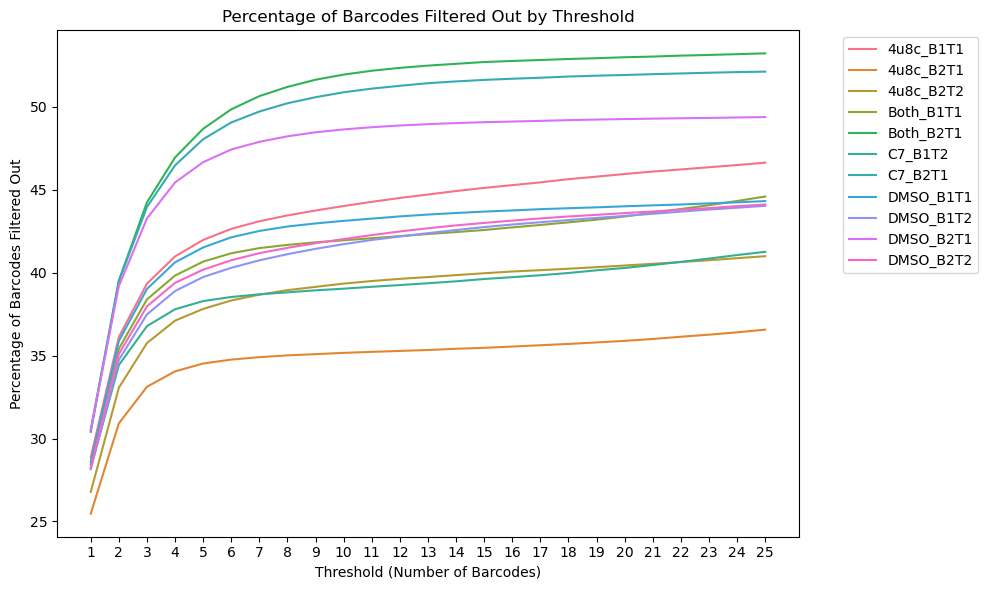

In [11]:
# Prepare the data
data = []
for threshold in range(1, 26):
    for name, barcode_data in barcode_counts_dict.items():
        below_threshold = sum(count < threshold for count in barcode_data['count'])
        total_barcodes = len(barcode_data['count'])
        percentage = (below_threshold / total_barcodes) * 100
        data.append({'Threshold': threshold, 'Percentage': percentage, 'Name': name})

df = pd.DataFrame(data)

# Create the line plot
plt.figure(figsize=(10,6))
lineplot = sns.lineplot(x='Threshold', y='Percentage', hue='Name', data=df, marker=None)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Percentage of Barcodes Filtered Out by Threshold')
plt.xlabel('Threshold (Number of Barcodes)')
plt.ylabel('Percentage of Barcodes Filtered Out')
plt.xticks(range(1, 26))

plt.tight_layout()

#plt.savefig('barcodes_filtered.png', format='png', dpi=300)

plt.show()
